# 딥 러닝을 이용한 자연어 처리 입문

[구글 코랩에서 실행하기](https://colab.research.google.com/drive/1FojsSx44oQcyPjU6iU0aox3B5YUOP4xX?usp=sharing)

https://wikidocs.net/22882

07. 딥 러닝(Deep Learning) 개요

딥 러닝(Deep Learning)은 머신 러닝(Machine Learning)의 특정한 한 분야로서 인공 신경망(Artificial Neural Network)의 층을 연속적으로 깊게 쌓아올려 데이터를 학습하는 방식을 말합니다. 딥 러닝이 화두가 되기 시작한 것은 2010년대의 비교적 최근의 일이지만, 딥 러닝의 기본 구조인 인공 신경망의 역사는 생각보다 오래되었습니다. 이번 챕터에서는 딥 러닝을 보다 쉽게 이해하기 위해 1957년의 초기 인공 신경망인 퍼셉트론에서부터 설명을 시작하여 층을 깊게 쌓아 학습하는 딥 러닝까지 개념을 점차적으로 확장해보겠습니다. 추가적으로 이번 챕터에서는 피드 포워드 신경망과 같은 기본적인 인공 신경망 용어들과 케라스의 사용 방법에 대해서 학습합니다.

07-01 퍼셉트론(Perceptron)

인공 신경망은 수많은 머신 러닝 방법 중 하나입니다. 하지만 최근 인공 신경망을 복잡하게 쌓아 올린 딥 러닝이 다른 머신 러닝 방법들을 뛰어넘는 성능을 보여주는 사례가 늘면서, 전통적인 머신 러닝과 딥 러닝을 구분해서 이해해야 한다는 목소리가 커지고 있습니다. 딥 러닝을 이해하기 위해서는 우선 인공 신경망에 대한 이해가 필요한데, 여기서는 초기의 인공 신경망인 퍼셉트론(Perceptron)에 대해서 이해합니다.

1. 퍼셉트론(Perceptron)

퍼셉트론(Perceptron)은 프랑크 로젠블라트(Frank Rosenblatt)가 1957년에 제안한 초기 형태의 인공 신경망으로 다수의 입력으로부터 하나의 결과를 내보내는 알고리즘입니다. 퍼셉트론은 실제 뇌를 구성하는 신경 세포 뉴런의 동작과 유사한데, 신경 세포 뉴런의 그림을 먼저 보도록 하겠습니다. 뉴런은 가지돌기에서 신호를 받아들이고, 이 신호가 일정치 이상의 크기를 가지면 축삭돌기를 통해서 신호를 전달합니다.

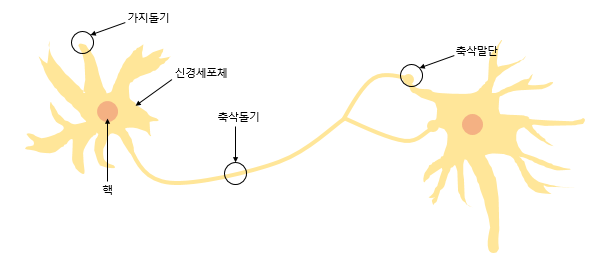

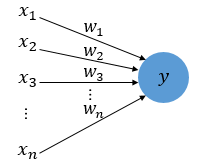

x는 입력값을 의미하며, w
는 가중치(Weight), y
는 출력값입니다. 그림 안의 원은 인공 뉴런에 해당됩니다. 실제 신경 세포 뉴런에서의 신호를 전달하는 축삭돌기의 역할을 퍼셉트론에서는 가중치가 대신합니다. 각각의 인공 뉴런에서 보내진 입력값 x
는 각각의 가중치 w
와 함께 종착지인 인공 뉴런에 전달되고 있습니다.

각각의 입력값에는 각각의 가중치가 존재하는데, 이때 가중치의 값이 크면 클수록 해당 입력 값이 중요하다는 것을 의미합니다.

각 입력값이 가중치와 곱해져서 인공 뉴런에 보내지고, 각 입력값과 그에 해당되는 가중치의 곱의 전체 합이 임계치(threshold)를 넘으면 종착지에 있는 인공 뉴런은 출력 신호로서 1을 출력하고, 그렇지 않을 경우에는 0을 출력합니다. 이러한 함수를 계단 함수(Step function)라고 하며, 아래는 그래프는 계단 함수의 하나의 예를 보여줍니다.



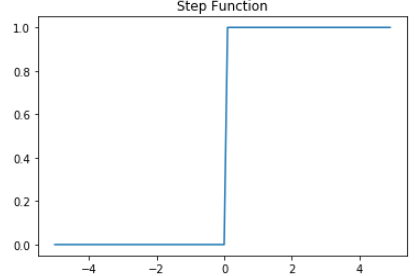

이때 계단 함수에 사용된 이 임계치값을 수식으로 표현할 때는 보통 세타(Θ)로 표현합니다. 식으로 표현하면 다음과 같습니다.

if \sum_i^{n} w_{i}x_{i}\ ≥ \theta → y=1

if \sum_i^{n} w_{i}x_{i}\ < \theta → y=0

위의 식에서 임계치를 좌변으로 넘기고 편향 b
(bias)로 표현할 수도 있습니다. 편향 b
 또한 퍼셉트론의 입력으로 사용됩니다. 보통 그림으로 표현할 때는 입력값이 1로 고정되고 편향 b
가 곱해지는 변수로 표현됩니다.

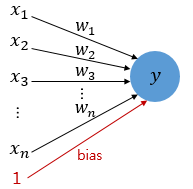

if \sum_i^{n} w_{i}x_{i} + b ≥ 0 → y=1

if \sum_i^{n} w_{i}x_{i} + b < 0 → y=0

이 책을 포함한 많은 인공 신경망 자료에서 편의상 편향 b
가 그림이나 수식에서 생략되서 표현되기도 하지만 실제로는 편향 b
 또한 딥 러닝이 최적의 값을 찾아야 할 변수 중 하나입니다.

뒤에서 배우겠지만 이렇게 뉴런에서 출력값을 변경시키는 함수를 활성화 함수(Activation Function)라고 합니다. 초기 인공 신경망 모델인 퍼셉트론은 활성화 함수로 계단 함수를 사용하였지만, 그 뒤에 등장한 여러가지 발전된 신경망들은 계단 함수 외에도 여러 다양한 활성화 함수를 사용하기 시작했습니다. 사실 앞서 배운 시그모이드 함수나 소프트맥스 함수 또한 활성화 함수 중 하나입니다.

퍼셉트론을 배우기 전에 로지스틱 회귀를 먼저 배운 이유도 여기에 있습니다. 퍼셉트론의 활성화 함수는 계단 함수이지만 여기서 활성화 함수를 시그모이드 함수로 변경하면 방금 배운 퍼셉트론은 곧 이진 분류를 수행하는 로지스틱 회귀와 동일함을 알 수 있습니다.

다시 말하면 로지스틱 회귀 모델이 인공 신경망에서는 하나의 인공 뉴런으로 볼 수 있습니다. 로지스틱 회귀를 수행하는 인공 뉴런과 위에서 배운 퍼셉트론의 차이는 오직 활성화 함수의 차이입니다.

인공 뉴런 : 활성화 함수 f(\sum_i^{n} w_{i}x_{i} + b)\
위의 퍼셉트론(인공 뉴런 종류 중 하나) : 계단 함수 f(\sum_i^{n} w_{i}x_{i} + b)


2. 단층 퍼셉트론(Single-Layer Perceptron)

위에서 배운 퍼셉트론을 단층 퍼셉트론이라고 합니다. 퍼셉트론은 단층 퍼셉트론과 다층 퍼셉트론으로 나누어지는데, 단층 퍼셉트론은 값을 보내는 단계과 값을 받아서 출력하는 두 단계로만 이루어집니다. 이때 이 각 단계를 보통 층(layer)이라고 부르며, 이 두 개의 층을 입력층(input layer)과 출력층(output layer)이라고 합니다.



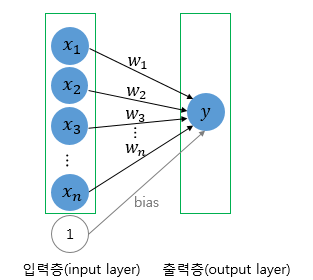

단층 퍼셉트론이 어떤 일을 할 수 있으며 한계는 무엇인지 학습해보겠습니다. 컴퓨터는 두 개의 값 0과 1을 입력해 하나의 값을 출력하는 회로가 모여 만들어지는데, 이 회로를 게이트(gate)라고 부릅니다. 초기 형태의 인공 신경망인 단층 퍼셉트론은 간단한 XOR 게이트조차도 구현할 수 없는 부족한 인공 신경망이라는 지적을 받았습니다. 단층 퍼셉트론을 이용하면 AND, NAND, OR 게이트는 구현가능합니다. 게이트 연산에 쓰이는 것은 두 개의 입력값과 하나의 출력값입니다. AND 게이트란 두 개의 입력값 x1, x2
이 각각 0 또는 1의 값을 가질 수 있으면서 모두 1인 경우에만 출력값 y
가 1이 나오는 구조를 말합니다.

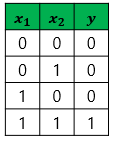

단층 퍼셉트론의 식을 통해 AND 게이트를 만족하는 두 개의 가중치와 편향 값에는 뭐가 있을까요? 각각 w1, w2, b
,
,
라고 한다면 [0.5, 0.5, -0.7], [0.5, 0.5, -0.8] 또는 [1.0, 1.0, -1.0] 등 이 외에도 다양한 가중치와 편향의 조합이 나올 수 있습니다. 이해를 돕기 위해서 AND 게이트를 위한 매개변수 값을 가진 단층 퍼셉트론의 식을 파이썬 코드로 간단하게 구현해봅시다.

In [1]:
def AND_gate(x1, x2):
    w1 = 0.5
    w2 = 0.5
    b = -0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

위의 함수에 AND 게이트의 입력값을 모두 넣어보면 오직 두 개의 입력값이 1인 경우에만 1을 출력합니다.

In [2]:
AND_gate(0, 0), AND_gate(0, 1), AND_gate(1, 0), AND_gate(1, 1)

(0, 0, 0, 1)

그렇다면 두 개의 입력값이 1인 경우에만 출력값이 0, 나머지 입력값의 쌍(pair)에 대해서는 모두 출력값이 1이 나오는 NAND 게이트는 어떨까요?

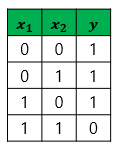

앞서 언급했던 AND 게이트를 충족하는 가중치와 편향값인 [0.5, 0.5, -0.7]에 -를 붙여서 [-0.5, -0.5, +0.7]을 단층 퍼셉트론의 식에 넣어보면 NAND 게이트를 충족합니다. 파이썬 코드를 통해서 이를 확인해봅시다.

In [4]:
def NAND_gate(x1, x2):
    w1 = -0.5
    w2 = -0.5
    b = 0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

단지 같은 코드에 함수 이름과 가중치와 편향만 바꿨을 뿐입니다. 퍼셉트론의 구조는 같기때문입니다.

In [5]:
NAND_gate(0, 0), NAND_gate(0, 1), NAND_gate(1, 0), NAND_gate(1, 1)

(1, 1, 1, 0)

NAND 게이트를 구현한 파이썬 코드에 입력값을 넣자, 두 개의 입력값이 1인 경우에만 0이 나오는 것을 확인할 수 있습니다. 퍼셉트론으로 NAND 게이트를 구현한 것입니다. [-0.5, -0.5, -0.7] 외에도 퍼셉트론이 NAND 게이트의 동작을 하도록 하는 다양한 가중치와 편향의 값들이 있을 것입니다.

두 개의 입력이 모두 0인 경우에 출력값이 0이고 나머지 경우에는 모두 출력값이 1인 OR 게이트 또한 적절한 가중치 값과 편향 값만 찾으면 단층 퍼셉트론의 식으로 구현할 수 있습니다.

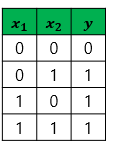

예를 들어 각각 가중치와 편향에 대해서 [0.6, 0.6, -0.5]를 선택하면 OR 게이트를 충족합니다.

In [6]:
def OR_gate(x1, x2):
    w1 = 0.6
    w2 = 0.6
    b = -0.5
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

OR_gate(0, 0), OR_gate(0, 1), OR_gate(1, 0), OR_gate(1, 1)

(0, 1, 1, 1)

이 외에도 이를 충족하는 다양한 가중치와 편향의 값이 있습니다.

이처럼 단층 퍼셉트론은 AND 게이트, NAND 게이트, OR 게이트를 구현할 수 있으나 지금부터 설명할 XOR 게이트는 구현할 수 없습니다. XOR 게이트는 입력값 두 개가 서로 다른 값을 갖고 있을때에만 출력값이 1이 되고, 입력값 두 개가 서로 같은 값을 가지면 출력값이 0이 되는 게이트입니다. 위의 파이썬 코드에 아무리 수많은 가중치와 편향을 넣어봐도 XOR 게이트를 구현하는 것은 불가능합니다. 그 이유는 단층 퍼셉트론은 직선 하나로 두 영역을 나눌 수 있는 문제에 대해서만 구현이 가능하기 때문입니다.

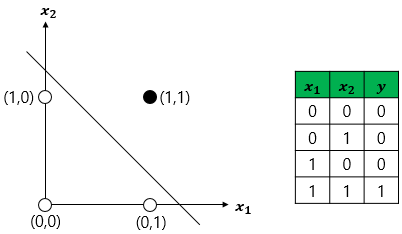https://wikidocs.net/images/page/24958/andgraphgate.PNG

그림에서는 출력값 0을 하얀색 원, 1을 검은색 원으로 표현했습니다. AND 게이트를 충족하려면 하얀색 원과 검은색 원을 직선으로 나누게 됩니다. 마찬가지로 NAND 게이트나 OR 게이트에 대해서도 시각화를 했을 때 직선으로 나누는 것이 가능합니다.

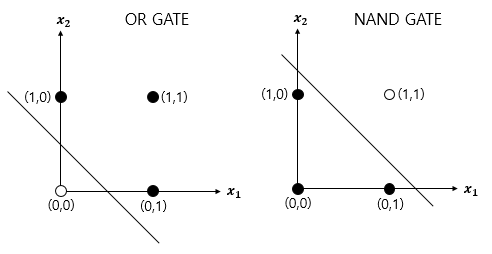

그렇다면 XOR 게이트는 어떨까요? XOR 게이트는 입력값 두 개가 서로 다른 값을 갖고 있을때에만 출력값이 1이 되고, 입력값 두 개가 서로 같은 값을 가지면 출력값이 0이 되는 게이트입니다. XOR 게이트를 시각화해보면 다음과 같습니다.

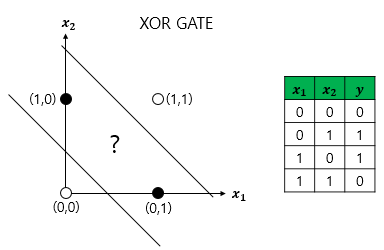

하얀색 원과 검은색 원을 직선 하나로 나누는 것은 불가능하므로 단층 퍼셉트론으로는 XOR 게이트를 구현할 수 없습니다. 위의 좌측 그림과 같이 적어도 두 개의 선이 필요합니다. 이를 어떻게 해결할 수 있을까요? 이에 대한 해답은 다층 퍼셉트론입니다. 다층 퍼셉트론을 사용하면 여러 개의 선으로 분류하는 효과를 얻을 수 있습니다.

3. 다층 퍼셉트론(MultiLayer Perceptron, MLP)

XOR 게이트는 기존의 AND, NAND, OR 게이트를 조합하면 만들 수 있습니다. 퍼셉트론 관점에서 말하면 층을 더 쌓으면 만들 수 있습니다. 다층 퍼셉트론과 단층 퍼셉트론의 차이는 단층 퍼셉트론은 입력층과 출력층만 존재하지만, 다층 퍼셉트론은 중간에 층을 더 추가하였다는 점입니다. 이렇게 입력층과 출력층 사이에 존재하는 층을 은닉층(hidden layer)이라고 합니다. 즉, 다층 퍼셉트론은 중간에 은닉층이 존재한다는 점이 단층 퍼셉트론과 다릅니다. 다층 퍼셉트론은 줄여서 MLP라고도 부릅니다.

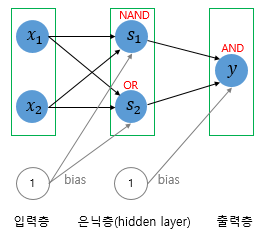

위의 그림은 AND, NAND, OR 게이트를 조합하여 XOR 게이트를 구현한 다층 퍼셉트론의 예입니다. (실제 구현은 숙제로 남겨두겠습니다. 힌트를 드리자면 위의 단층 퍼셉트론에서 사용한 함수들을 그대로 사용하면 됩니다.) XOR 예제에서는 은닉층 1개만으로 문제를 해결할 수 있었지만, 다층 퍼셉트론은 본래 은닉층이 1개 이상인 퍼셉트론을 말합니다. 즉, XOR 문제나 기타 복잡한 문제를 해결하기 위해서 다층 퍼셉트론은 중간에 수많은 은닉층을 더 추가할 수 있습니다. 은닉층의 개수는 2개일 수도 있고, 수십 개일수도 있고 사용자가 설정하기 나름입니다. 아래는 더 어려운 문제를 풀기 위해서 은닉층이 하나 더 추가되고(이 경우에는 은닉층이 2개), 뉴런의 개수를 늘린 다층 퍼셉트론의 모습을 보여줍니다.

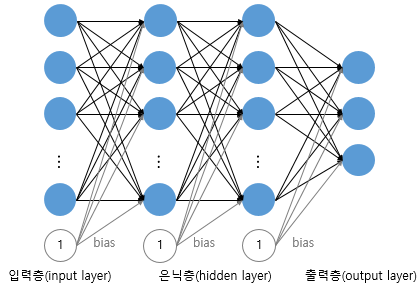

위와 같이 은닉층이 2개 이상인 신경망을 심층 신경망(Deep Neural Network, DNN) 이라고 합니다. 심층 신경망은 다층 퍼셉트론만 이야기 하는 것이 아니라, 여러 변형된 다양한 신경망들도 은닉층이 2개 이상이 되면 심층 신경망이라고 합니다.

지금까지는 OR, AND, XOR 게이트 등. 퍼셉트론이 제대로 된 정답을 출력할 때까지 저자가 직접 가중치를 바꿔보면서 적절한 가중치를 수동으로 찾았습니다. 하지만 이제는 기계가 가중치를 스스로 찾아내도록 자동화시켜야하는데, 이것이 머신 러닝에서 말하는 훈련(training) 또는 학습(learning) 단계에 해당됩니다. 앞서 선형 회귀와 로지스틱 회귀에서 보았듯이 손실 함수(Loss function)와 옵티마이저(Optimizer)를 사용합니다. 그리고 만약 학습을 시키는 인공 신경망이 심층 신경망일 경우에는 이를 심층 신경망을 학습시킨다고 하여, 딥 러닝(Deep Learning)이라고 합니다.